# 🧪 Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the A/B testing dataset comparing an ad campaign group and a PSA group.

## Goals:
- Understand dataset structure and group balance
- Explore conversion rates and basic descriptive statistics
- Visualize key distributions (total ads, conversion rate, etc.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv('marketing_AB.csv')
df['converted'] = df['converted'].astype(int)

Dataset shape: (588101, 7)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  int64 
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 31.4+ MB
None

First 5 rows:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad          0        130       Monday   
1           1  1119715         ad          0         93      Tuesday   
2           2  1144181         ad          0         21      Tuesday   
3           3  1435133         ad          0        355      Tuesday   
4           4  1015700

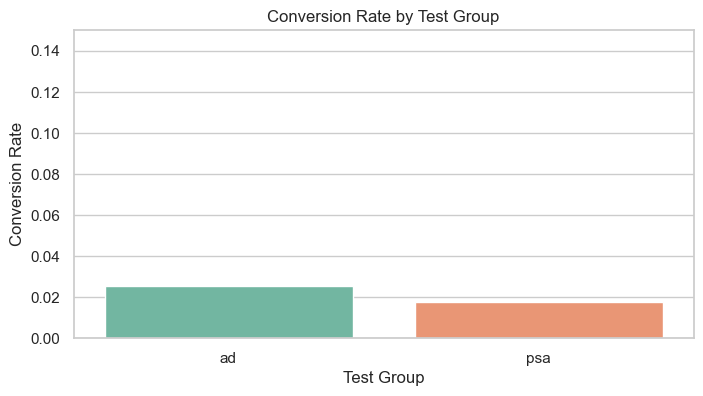

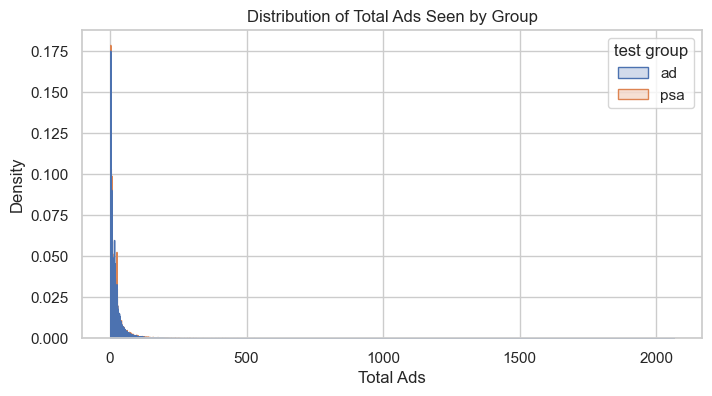

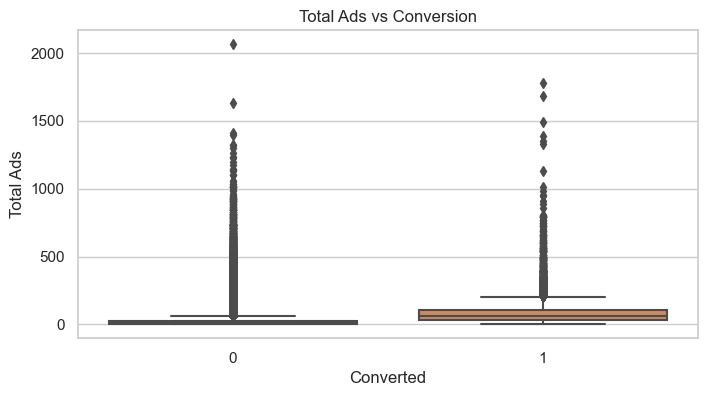

In [2]:
import numpy as np

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

# 📊 Basic info
print("Dataset shape:", df.shape)
print("\nColumn info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 📊 Group size and conversion rate
group_counts = df['test group'].value_counts()
conversion_rates = df.groupby('test group')['converted'].mean()

print("\nSample size by group:")
print(group_counts)

print("\nConversion rate by group:")
print(conversion_rates)

# 📈 Bar plot: Conversion rate by group
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='Set2')
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Test Group")
plt.ylim(0, 0.15)
plt.show()

# 📈 Histogram: Total ads seen per group
sns.histplot(data=df, x='total ads', hue='test group', element='step', stat='density', common_norm=False)
plt.title("Distribution of Total Ads Seen by Group")
plt.xlabel("Total Ads")
plt.ylabel("Density")
plt.show()

# 📈 Boxplot: Total ads by conversion
sns.boxplot(x='converted', y='total ads', data=df)
plt.title("Total Ads vs Conversion")
plt.xlabel("Converted")
plt.ylabel("Total Ads")
plt.show()

## Summary of Exploratory Findings

- **Group sizes**: The dataset is heavily imbalanced, with 564,577 users in the ad group and only 23,524 users in the PSA group. This imbalance should be considered when interpreting statistical significance and in model training.

- **Conversion rates**: The ad group shows a higher conversion rate (≈2.55%) compared to the PSA group (≈1.79%), suggesting a potential positive effect from ad exposure. This difference will be further tested using hypothesis testing and modeling.

- **Ad exposure distribution**: The total number of ads seen per user is highly right-skewed, with most users seeing relatively few ads. However, the ad group generally sees more ads than the PSA group. This may confound the treatment effect and motivates the inclusion of `total ads` as a covariate in logistic regression.

- **Ad volume vs conversion**: The boxplot shows that users who converted tend to have seen more ads on average than those who didn’t. While this does not imply causality, it supports the hypothesis that ad exposure may influence conversion.

Overall, these observations suggest a relationship between ad exposure and conversion, but further statistical analysis is needed to establish significance and control for confounders.

In [3]:
from statsmodels.stats.proportion import proportions_ztest

# Total conversions and sample sizes by group
converted = df.groupby('test group')['converted'].sum().values
n_obs = df.groupby('test group')['converted'].count().values

# Run z-test
z_score, p_value = proportions_ztest(count=converted, nobs=n_obs)
print(f"Z-test for conversion rate difference:")
print(f"  z = {z_score:.4f}, p = {p_value:.4f}")

Z-test for conversion rate difference:
  z = 7.3701, p = 0.0000


## Proportion Z-Test: Conversion Rate Significance

To formally test whether the difference in conversion rates between the ad group and the PSA group is statistically significant, we perform a two-proportion z-test.

The null hypothesis is that the conversion rates for both groups are equal. The alternative hypothesis is that they are different.

Results:
- The z-test yields a large z-statistic and a p-value near zero (p < 0.001), strongly rejecting the null hypothesis.
- This confirms that the uplift in conversion rate observed in the ad group is statistically significant.
- However, given the large imbalance in group sizes, further modeling (e.g., logistic regression) is needed to adjust for confounding factors such as total ad exposure.

The z-test serves as a baseline significance test and supports further analysis.